In [2]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import hashlib
import numpy as np 

<h3>The following block of code will generate an image based on your Unique ID, you then have to perform SVD on that image.</h3>
<br>
(if you are interested in how the image is generated read the comments otherwise just run the cell as it is)


In [4]:

# Enter your Unique ID as variable unique_id
unique_id = 2287
id_number = str(unique_id)

# Image size
image_size = 256

# Create a blank color image
image = Image.new("RGB", (image_size, image_size), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Define the font size based on the image size
font_size = int(image_size / 2)

# Choose a font (you may need to provide the font file path)
font = ImageFont.truetype("Conquest-8MxyM.ttf", font_size)

# Calculate the hash value based on the ID
hash_value = hashlib.md5(id_number.encode()).hexdigest()

# Extract the RGB values from the hash value
red = int(hash_value[:2], 16)
green = int(hash_value[2:4], 16)
blue = int(hash_value[4:6], 16)

# Create a gradient background
gradient = np.tile(np.linspace(0, 255, image_size), (image_size, 1)).astype(np.uint8)
gradient_image = Image.fromarray(gradient, mode="L").convert("RGB")

# Overlay the gradient background on the image
image.paste(gradient_image, (0, 0))

# Define the rectangle parameters
rectangle_width = image_size // 2
rectangle_height = image_size // 4
top_left = ((image_size - rectangle_width) // 2, (image_size - rectangle_height) // 2)
bottom_right = (top_left[0] + rectangle_width, top_left[1] + rectangle_height)

# Draw a filled rectangle on the image
draw.rectangle([top_left, bottom_right], fill=(255 - red, 255 - green, 255 - blue))

# Calculate the text position
text_width, text_height = draw.textsize(id_number, font=font)
text_position = ((image_size - text_width) // 2, (image_size - text_height) // 2)

# Draw the text on the image with the calculated RGB values
draw.text(text_position, id_number, fill=(red, green, blue), font=font)

# convert the pil image to np array so that we can deal the image with pyplot library.
img = np.array(image)

C:\Users\adars\AppData\Local\Temp\ipykernel_24480\3006587957.py:43: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(id_number, font=font)


In [119]:
# convert the image to grayscale taking average value of the three R , G , B pixel values
img1 = np.zeros((img.shape[0:2]))
img1 = np.average(img, axis=-1)

# now perform Singular Value Decomposition on the image
u, s, vt = np.linalg.svd(img1, full_matrices=True)

# Number of components to use for reconstruction
num_components = 10

# Reconstruct the image using a subset of singular values and vectors
img1c = u[:,:num_components]@np.diag(s[:num_components])@vt[:num_components,:]

# Calculate the percentage reconstruction: (norm of generated image / norm of original grayscale image ) *100 
percentage_reconstruction = (np.linalg.norm(img1c)/np.linalg.norm(img1))*100

# to_submit = int(percentage_reconstruction *1000) % 100
to_submit = int(percentage_reconstruction*1000)%100

You need to submit this **to_submit** value in the quiz form.

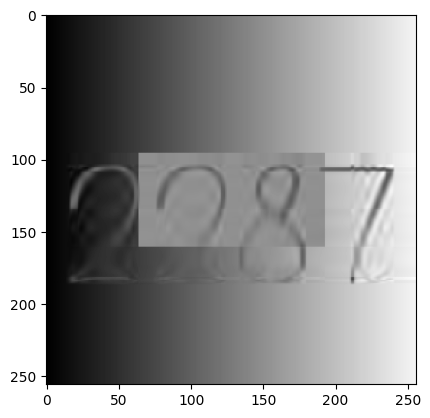

In [114]:
plt.imshow(img1c,cmap='gray')

In [120]:
to_submit

37